In [1]:
import pandas as pd

# Dosyayı oku
df = pd.read_csv("birlesik_veri.csv", parse_dates=["datetime"], index_col="datetime")

# İlk birkaç satırı göster
print(df.shape)
print(df.columns)
print(df.head())


(26304, 30)
Index(['PTF (TL/MWh)', 'PTF (USD/MWh)', 'PTF (EUR/MWh)',
       'Tüketim Miktarı(MWh)', 'Toplam', 'Doğal Gaz', 'Barajlı', 'Linyit',
       'Akarsu', 'İthal Kömür', 'Rüzgar', 'Güneş', 'Fuel Oil', 'Jeotermal',
       'Asfaltit Kömür', 'Taş Kömür', 'Biyokütle', 'Nafta', 'LNG',
       'Uluslararası', 'Atık Isı', 'GRF (TL/1000Sm3)', 'GRF (USD/1000Sm3)',
       'GRF (EUR/1000Sm3)', 'GRF (USD/MMBtu)', 'API2 (USD/ton)',
       'ALLSKY_SFC_SW_DWN', 'WS50M', 'T2M', 'T2MDEW'],
      dtype='object')
                     PTF (TL/MWh)  PTF (USD/MWh)  PTF (EUR/MWh)  \
datetime                                                          
2022-01-01 00:00:00        949.98          73.20          64.70   
2022-01-01 01:00:00        800.00          61.65          54.49   
2022-01-01 02:00:00        898.98          69.27          61.23   
2022-01-01 03:00:00       1047.00          80.68          71.31   
2022-01-01 04:00:00        799.70          61.62          54.47   

                     Tüke

In [2]:
import pandas as pd

# Dosyayı oku
df = pd.read_csv("birlesik_veri.csv", parse_dates=["datetime"]) #CSV dosyasını pandas veri çerçevesi (DataFrame) olarak oku.
#datetime sütununu doğrudan datetime tipine çevirir

df.set_index("datetime", inplace=True) #datetime sütununu DataFrame'in indeksine atar. 
#zaman bazli islemleri daha kolay yapmak icin

# Tarih bilgisiyle yeni öznitelikler oluşturalım (saat, gün, ay, haftasonu.)
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)
df["month"] = df.index.month

# Saat için sinüs ve kosinüs dönüşümü. 23’ten sonra tekrar 0 olur. Döngüsel saat döngüsü için.
import numpy as np
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

# Eksik veri kontrolü (ileride doldurulacak)
missing = df.isnull().sum() #Her sütunda kaç tane eksik veri olduğunu bul.
print(df.head())
print(missing) #Hangi sütunda kaç tane eksik değer olduğunu yaz

                     PTF (TL/MWh)  PTF (USD/MWh)  PTF (EUR/MWh)  \
datetime                                                          
2022-01-01 00:00:00        949.98          73.20          64.70   
2022-01-01 01:00:00        800.00          61.65          54.49   
2022-01-01 02:00:00        898.98          69.27          61.23   
2022-01-01 03:00:00       1047.00          80.68          71.31   
2022-01-01 04:00:00        799.70          61.62          54.47   

                     Tüketim Miktarı(MWh)    Toplam  Doğal Gaz  Barajlı  \
datetime                                                                  
2022-01-01 00:00:00              31021.25  30983.59    9211.47  3537.80   
2022-01-01 01:00:00              29710.69  29672.68    8336.79  3337.10   
2022-01-01 02:00:00              28318.53  28282.42    7688.36  2514.12   
2022-01-01 03:00:00              27169.55  27135.73    7004.94  1991.23   
2022-01-01 04:00:00              26525.16  26491.49    6969.12  1717.93   

    

In [3]:
# API2 sütunundaki eksik değerleri önce forward fill ile, ardından backfill ile doldur

df["API2 (USD/ton)"] = df["API2 (USD/ton)"].ffill().bfill() #Eksik değeri kendisinden önceki değerle doldur.
#örneğin: [NaN, 10, NaN, NaN, 20] → ffill → [NaN, 10, 10, 10, 20] ve [NaN, 10, 10, 10, 20] → bfill → [10, 10, 10, 10, 20]

# Eksik kaldı mı kontrol edelim
missing_api2 = df["API2 (USD/ton)"].isnull().sum()     # .isnull().sum()Eksik (NaN) değerlerin toplamını ver
print(f"API2 eksik kalan değer sayısı: {missing_api2}")


API2 eksik kalan değer sayısı: 0


In [4]:
#  eksik veri kontrolü ve veri türü analizi
df_info = {
    "Sütun": df.columns,
    "Eksik Değer Sayısı": df.isnull().sum().values,
    "Veri Türü": df.dtypes.values
}

df_summary = pd.DataFrame(df_info)
print(df_summary)

                   Sütun  Eksik Değer Sayısı Veri Türü
0           PTF (TL/MWh)                   0   float64
1          PTF (USD/MWh)                   0   float64
2          PTF (EUR/MWh)                   0   float64
3   Tüketim Miktarı(MWh)                   0   float64
4                 Toplam                   0   float64
5              Doğal Gaz                   0   float64
6                Barajlı                   0   float64
7                 Linyit                   0   float64
8                 Akarsu                   0   float64
9            İthal Kömür                   0   float64
10                Rüzgar                   0   float64
11                 Güneş                   0   float64
12              Fuel Oil                   0   float64
13             Jeotermal                   0   float64
14        Asfaltit Kömür                   0   float64
15             Taş Kömür                   0   float64
16             Biyokütle                   0   float64
17        

In [5]:
#KATMANLARIN OLUSTURULMASI

In [6]:
#KATMAN 1
# Zaman serisi varsayımıyla index'e göre zaman öznitelikleri oluşturulması

# 1. Geçmiş 1-3 günün ortalama PTF’si
df["PTF_avg_1d"] = df["PTF (TL/MWh)"].shift(24).rolling(window=24).mean() 
#shift(24): Veriyi 24 saat (1 gün) geriye kaydırır.
#rolling(window=24).mean(): Önceki 24 saatin ortalamasını alır.

df["PTF_avg_3d"] = df["PTF (TL/MWh)"].shift(72).rolling(window=72).mean()

# 2. Önceki günün minimum ve maksimum PTF’si
#önceki günün fiyat oynaklığını yansıtmak için.Ayrıca gün içi fiyat aralığını öğrenmek için.
df["PTF_min_1d"] = df["PTF (TL/MWh)"].shift(24).rolling(window=24).min()
df["PTF_max_1d"] = df["PTF (TL/MWh)"].shift(24).rolling(window=24).max()

# 3. Aynı saatin bir önceki gündeki değeri (lag 24 saat)
#Örnepşn 3.00 saatinin tahmini yapılırken, dünkü 13.00 değeri genellikle yüksek korelasyona sahiptir.
df["PTF_lag_24"] = df["PTF (TL/MWh)"].shift(24)

print(df.head(48))



                     PTF (TL/MWh)  PTF (USD/MWh)  PTF (EUR/MWh)  \
datetime                                                          
2022-01-01 00:00:00        949.98          73.20          64.70   
2022-01-01 01:00:00        800.00          61.65          54.49   
2022-01-01 02:00:00        898.98          69.27          61.23   
2022-01-01 03:00:00       1047.00          80.68          71.31   
2022-01-01 04:00:00        799.70          61.62          54.47   
2022-01-01 05:00:00        725.00          55.87          49.38   
2022-01-01 06:00:00        929.99          71.66          63.34   
2022-01-01 07:00:00        898.98          69.27          61.23   
2022-01-01 08:00:00        984.95          75.90          67.08   
2022-01-01 09:00:00       1044.65          80.50          71.15   
2022-01-01 10:00:00       1080.00          83.22          73.56   
2022-01-01 11:00:00       1032.00          79.52          70.29   
2022-01-01 12:00:00        800.00          61.65          54.4

In [7]:
print(df.columns.tolist())


['PTF (TL/MWh)', 'PTF (USD/MWh)', 'PTF (EUR/MWh)', 'Tüketim Miktarı(MWh)', 'Toplam', 'Doğal Gaz', 'Barajlı', 'Linyit', 'Akarsu', 'İthal Kömür', 'Rüzgar', 'Güneş', 'Fuel Oil', 'Jeotermal', 'Asfaltit Kömür', 'Taş Kömür', 'Biyokütle', 'Nafta', 'LNG', 'Uluslararası', 'Atık Isı', 'GRF (TL/1000Sm3)', 'GRF (USD/1000Sm3)', 'GRF (EUR/1000Sm3)', 'GRF (USD/MMBtu)', 'API2 (USD/ton)', 'ALLSKY_SFC_SW_DWN', 'WS50M', 'T2M', 'T2MDEW', 'hour', 'dayofweek', 'is_weekend', 'month', 'hour_sin', 'hour_cos', 'PTF_avg_1d', 'PTF_avg_3d', 'PTF_min_1d', 'PTF_max_1d', 'PTF_lag_24']


In [8]:
#KATMAN 2
#aman serisi modellemesinde mevsimsel etkileri dikkate almak için 
# Bir önceki yılın aynı saatine ait PTF (365 gün * 24 saat = 8760 saat önce)
#shift(8760): Zaman serisini 8760 saat (365 gün × 24 saat) geriye kaydırır.
df["PTF_last_year"] = df["PTF (TL/MWh)"].shift(8760)

#Sonuç: Her saat için tam 1 yıl önceki aynı saatin PTF (TL/MWh) değeri alınır.

df["PTF_lag_168"] = df["PTF (TL/MWh)"].shift(168)  # 1 hafta önceki aynı saat
df["PTF_lag_720"] = df["PTF (TL/MWh)"].shift(720)  # 30 gün önceki aynı saat
df["PTF_lag_8760_diff"] = df["PTF (TL/MWh)"] - df["PTF_last_year"]


In [9]:
#KATMAN 3

# Günlük ortalama, minimum ve maksimum PTF'leri hesapla
#rolling(window=24): Her 24 saatlik hareketli pencere içinde işlem yapar. Saatlik veri için bu, günlük analiz anlamına gelir.
#rolling(window=24): Her 24 saatlik hareketli pencere içinde işlem yapar. Saatlik veri için bu, günlük analiz anlamına gelir.
df["PTF_avg_1d_current"] = df["PTF (TL/MWh)"].rolling(window=24, min_periods=1).mean()
df["PTF_min_1d_current"] = df["PTF (TL/MWh)"].rolling(window=24, min_periods=1).min()
df["PTF_max_1d_current"] = df["PTF (TL/MWh)"].rolling(window=24, min_periods=1).max()
#Gün içi oynaklığı:O anki fiyatın günlük normale göre yüksek mi düşük mü olduğunu öğrenmesini sağlar.
df["PTF_range_1d"] = df["PTF_max_1d"] - df["PTF_min_1d"]
df["PTF_dev_from_avg"] = df["PTF (TL/MWh)"] - df["PTF_avg_1d"]



In [11]:
#KATMAN 4

# Son 7 günün saatlik ortalamasını hesapla (7*24 = 168 saatlik pencere)
df["PTF_avg_7d"] = df["PTF (TL/MWh)"].rolling(window=168, min_periods=1).mean()

# PTF'de trend: bugünkü ortalama - geçen haftaki ortalama
df["PTF_trend_7d"] = df["PTF_avg_1d"] - df["PTF_avg_1d"].shift(24 * 7)

# Bir önceki günün aynı saatine ait PTF (lag-24)
df["PTF_lag_24_redundant"] = df["PTF (TL/MWh)"].shift(24)

#Z-score ile normalleştirilmiş PTF
df["PTF_std_7d"] = df["PTF (TL/MWh)"].rolling(window=168, min_periods=1).std()
df["PTF_zscore_7d"] = (df["PTF (TL/MWh)"] - df["PTF_avg_7d"]) / df["PTF_std_7d"]




In [12]:
#KATMAN 5 - RUZGAR

#Bu katmanda WS50M (50 metrede rüzgar hızı) verisini kullanarak rüzgar üretiminin hava durumuna bağlı kısmını modelleme

# Eğer rüzgar hızı (WS50M) sıfıra yakınsa, Rüzgar / WS50M işlemi sıfıra bölme hatası doğurabilir.
epsilon = 0.1

# Normalize edilmiş rüzgar üretimi: üretim / hız
#rüzgar gücünün meteorolojik potansiyeline göre ne kadar etkin kullanıldığını ölçer.
df["Wind_Eff"] = df["Rüzgar"] / (df["WS50M"] + epsilon)

# Hıza bağlı ağırlıklı üretim (bu sadece örnek bir dönüşüm)
#Havanın daha hızlı estiği saatlerde üretimin etkisi daha büyük olabilir.
df["Wind_Prod_Adjusted"] = df["WS50M"] * df["Rüzgar"]

#rüzgar türbinleri teorik olarak kübik güç ilişkisi ile çalışır:
df["Wind_Power_Phys"] = (df["WS50M"] ** 3)

#Zaman gecikmeli etkiler (lag):
df["WS50M_lag_24"] = df["WS50M"].shift(24)
df["Wind_Eff_lag_24"] = df["Wind_Eff"].shift(24)

#trend veya değişim oranı:
df["WS50M_trend"] = df["WS50M"] - df["WS50M"].shift(24)

#Kümülatif üretim veya ortalama verim:
df["Wind_Eff_rolling3d"] = df["Wind_Eff"].rolling(window=72).mean()




In [13]:
#KATMAN 6 - GUNES

# Çok küçük ışınım değerlerinde sıfıra bölme hatasını engellemek için küçük sabit
epsilon = 0.1

# güneş santralinin atmosferden gelen ışınıma karşı ne kadar üretim yaptığına dair bir gösterge
# Normalize edilmiş güneş üretimi: üretim / ışınım
df["Solar_Eff"] = df["Güneş"] / (df["ALLSKY_SFC_SW_DWN"] + epsilon)

# Işınıma göre ağırlıklı güneş üretimi (örnek dönüşüm)
#hava çok güneşliyse ve üretim fazlaysa bu değer yükselir 
df["Solar_Prod_Adjusted"] = df["Güneş"] * df["ALLSKY_SFC_SW_DWN"]

#Işınım bazlı zaman gecikmeli etkiler:
df["Solar_Eff_lag_24"] = df["Solar_Eff"].shift(24)
df["ALLSKY_lag_24"] = df["ALLSKY_SFC_SW_DWN"].shift(24)

#Işınım trendi:
df["Solar_Irradiance_Trend"] = df["ALLSKY_SFC_SW_DWN"] - df["ALLSKY_SFC_SW_DWN"].shift(24)

#Güneş üretimi sapması:
df["Solar_dev_from_mean"] = df["Güneş"] - df["Güneş"].rolling(window=24).mean()

#Z-score ile normalizasyon:
df["Solar_Eff_zscore"] = (df["Solar_Eff"] - df["Solar_Eff"].rolling(72).mean()) / df["Solar_Eff"].rolling(72).std()



In [16]:
#KATMAN 7
#Gerçek zamanlı tüketim verisinden öznitelikler çıkararak modelin talep yönlü etkileri öğrenmesini sağlamak.

#Önceki Günün Aynı Saatindeki Tüketim (Lag-24)
df["Demand_lag_24"] = df["Tüketim Miktarı(MWh)"] .shift(24)

#7 Gün Önceki Aynı Saatin Tüketimi (Lag-168)
df["Demand_lag_168"] = df["Tüketim Miktarı(MWh)"].shift(168)

#1 Günlük Ortalama Tüketim (Günlük Talep Eğilimi)
df["Demand_avg_1d"] = df["Tüketim Miktarı(MWh)"].rolling(window=24, min_periods=1).mean()

#7 Günlük Ortalama Tüketim (Haftalık Talep Seviyesi)
df["Demand_avg_7d"] = df["Tüketim Miktarı(MWh)"].rolling(window=168, min_periods=1).mean()

#1 Günlük Tüketim Oynaklığı (Talep Kararsızlığı)
df["Demand_vol_1d"] = df["Tüketim Miktarı(MWh)"].rolling(window=24, min_periods=1).std()

#Günlük Trend (Bugünkü Ortalama – Dünkü Ortalama)
df["Demand_trend_1d"] = df["Demand_avg_1d"] - df["Demand_avg_1d"].shift(24)

#Tüketim Z-Score (Anormal Yük Tespiti için)
df["Demand_zscore_7d"] = (
    df["Tüketim Miktarı(MWh)"] - df["Demand_avg_7d"]
) / df["Tüketim Miktarı(MWh)"].rolling(window=168).std()


#Tüketim ile Saat-Gün İlişkisi
df["Demand_hour_avg"] = df.groupby(df.index.hour)["Tüketim Miktarı(MWh)"].transform("mean")
df["Demand_dayofweek_avg"] = df.groupby(df.index.dayofweek)["Tüketim Miktarı(MWh)"].transform("mean")


In [17]:
#KATMAN 8

#Doğal Gaz Referans Fiyatı (GRF)
#Günlük Ortalama
df["GRF_avg_1d"] = df["GRF (USD/1000Sm3)"].rolling(window=24, min_periods=1).mean()

#Haftalık Ortalama ve Trend
df["GRF_avg_7d"] = df["GRF (USD/1000Sm3)"].rolling(window=168, min_periods=1).mean()
df["GRF_trend_7d"] = df["GRF_avg_1d"] - df["GRF_avg_1d"].shift(168)

#Lag-24 ve Lag-168
df["GRF_lag_24"] = df["GRF (USD/1000Sm3)"].shift(24)
df["GRF_lag_168"] = df["GRF (USD/1000Sm3)"].shift(168)

#API2 (Kömür Fiyatı)
# Günlük ve Haftalık Ortalamalar
df["API2_avg_1d"] = df["API2 (USD/ton)"].rolling(window=24, min_periods=1).mean()
df["API2_avg_7d"] = df["API2 (USD/ton)"].rolling(window=168, min_periods=1).mean()

#Lag Değerler ve Trend
df["API2_lag_24"] = df["API2 (USD/ton)"].shift(24)
df["API2_trend_7d"] = df["API2_avg_1d"] - df["API2_avg_1d"].shift(168)


In [21]:
# MODELE GECIS

In [22]:
#MODELDE GIRDI CIKTI AYRIMI VE EKSIK VERI KONTROLU

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Tahmin edilecek hedef değişken (PTF)
target_col = "PTF (TL/MWh)"

# Girdiler: tüm diğer sütunlardan hedef değişkeni çıkar
feature_cols = df.columns.drop(target_col)

# Girdi (X) ve hedef (y) verisi
X = df[feature_cols]
y = df[target_col]

# Eksik veri varsa kontrol (zorunlu)
print("Eksik veri sayısı:")
print(X.isnull().sum().sort_values(ascending=False).head(10))


Eksik veri sayısı:
PTF_lag_8760_diff    8760
PTF_last_year        8760
PTF_lag_720           720
PTF_trend_7d          215
GRF_lag_168           168
GRF_trend_7d          168
Demand_lag_168        168
PTF_lag_168           168
API2_trend_7d         168
Demand_zscore_7d      167
dtype: int64


In [24]:
# Kalan eksik değerleri ileri ve geri doldur (özellikle üretim/verim katmanlarında olabilir)
X = X.fillna(method="ffill").fillna(method="bfill")

# Hedef değişkende eksik varsa sadece o satırları at
valid_idx = ~y.isnull()
X = X.loc[valid_idx]
y = y.loc[valid_idx]
print(X.isnull().sum().sort_values(ascending=False).head(10))

PTF (USD/MWh)          0
Wind_Eff               0
Solar_Prod_Adjusted    0
Solar_Eff              0
Wind_Eff_rolling3d     0
WS50M_trend            0
Wind_Eff_lag_24        0
WS50M_lag_24           0
Wind_Power_Phys        0
Wind_Prod_Adjusted     0
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_13164\4145153007.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method="ffill").fillna(method="bfill")


In [25]:
#EGITIM VE TEST AYRIMI

# Zaman serisinde zamanla ayrım yapılmalı: son %20 test verisi olarak ayrılır
test_size_ratio = 0.2
split_index = int(len(X) * (1 - test_size_ratio))

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


In [26]:
# OLCEKLEME - MIN/MAX NORMALIZASYONU

from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


In [27]:
# LTSM ICIN SEKANS HAZIRLIGI

def create_sequences(X, y, seq_length):
    X_seq, X_static, y_seq = [], [], []
    for i in range(seq_length, len(X)):
        X_seq.append(X[i-seq_length:i])       # Zaman penceresi
        X_static.append(X[i])                 # Son saat (sabit öznitelikler)
        y_seq.append(y[i])                    # O anki hedef
    return np.array(X_seq), np.array(X_static), np.array(y_seq)

# Pencere uzunluğu (örneğin son 24 saatlik veriyi kullanıyoruz)
seq_length = 24

X_seq_train, X_static_train, y_seq_train = create_sequences(X_train_scaled, y_train_scaled, seq_length)
X_seq_test, X_static_test, y_seq_test = create_sequences(X_test_scaled, y_test_scaled, seq_length)


In [28]:
# LTSM + MLP MODELININ KURULMASI

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate

# Inputlar
seq_input = Input(shape=(seq_length, X_train.shape[1]), name="seq_input")
static_input = Input(shape=(X_train.shape[1],), name="static_input")

# LSTM Katmanı (zaman penceresi için)
x_seq = LSTM(64, activation='tanh')(seq_input)

# MLP Katmanı (sabit öznitelikler için)
x_static = Dense(64, activation='relu')(static_input)

# Birleştirme ve çıkış
x = Concatenate()([x_seq, x_static])
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='linear')(x)

# Model
model = Model(inputs=[seq_input, static_input], outputs=output)
model.compile(optimizer='adam', loss='mse', metrics=["mae"])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ seq_input           │ (None, 24, 86)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ static_input        │ (None, 86)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 64)        │     38,656 │ seq_input[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      5,568 │ static_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128)       │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 32)        │      4,128 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         33 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 48,385 (189.00 KB)

 Trainable params: 48,385 (189.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# MODELIN EGITILMESI 

history = model.fit(
    [X_seq_train, X_static_train],
    y_seq_train,
    validation_split=0.2,
    epochs=72,
    batch_size=64,
    verbose=1
)

Epoch 1/72
263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0400 - mae: 0.1185 - val_loss: 0.0103 - val_mae: 0.0873
Epoch 2/72
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0012 - mae: 0.0272 - val_loss: 0.0076 - val_mae: 0.0757
Epoch 3/72
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.0209e-04 - mae: 0.0176 - val_loss: 0.0068 - val_mae: 0.0716
Epoch 4/72
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.3565e-04 - mae: 0.0144 - val_loss: 0.0040 - val_mae: 0.0537
Epoch 5/72
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 2.6499e-04 - mae: 0.0128 - val_loss: 0.0043 - val_mae: 0.0563
Epoch 6/72
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.9492e-04 - mae: 0.0110 - val_loss: 0.0040 - val_mae: 0.0540
Epoch 7/72
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.5670e-04 - mae: 0.0097 - val_loss: 0.0044 - val_mae: 0.0570
Epoch 8/72
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.5623e-04 - mae: 0.0097 - val_loss: 0.0033 - val_mae: 0.0488
Epoch 9/72
263/263 ━━━━━

In [31]:
# TAHMIN VE DEGERLENDIRME ASAMASI

In [32]:
# Test verisinde tahmin yap
y_pred_scaled = model.predict([X_seq_test, X_static_test])


164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [33]:
# Tahmin ve gerçek değerleri orijinal ölçeğe döndür
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_true = scaler_y.inverse_transform(y_seq_test.reshape(-1, 1)).ravel()



In [34]:
# PERFORMANS METRIKLERI

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred) * 100  # %
print(f"MAE: {mae:.2f} TL/MWh")
print(f"MAPE: {mape:.2f} %")


MAE: 176.90 TL/MWh
MAPE: 9.38 %


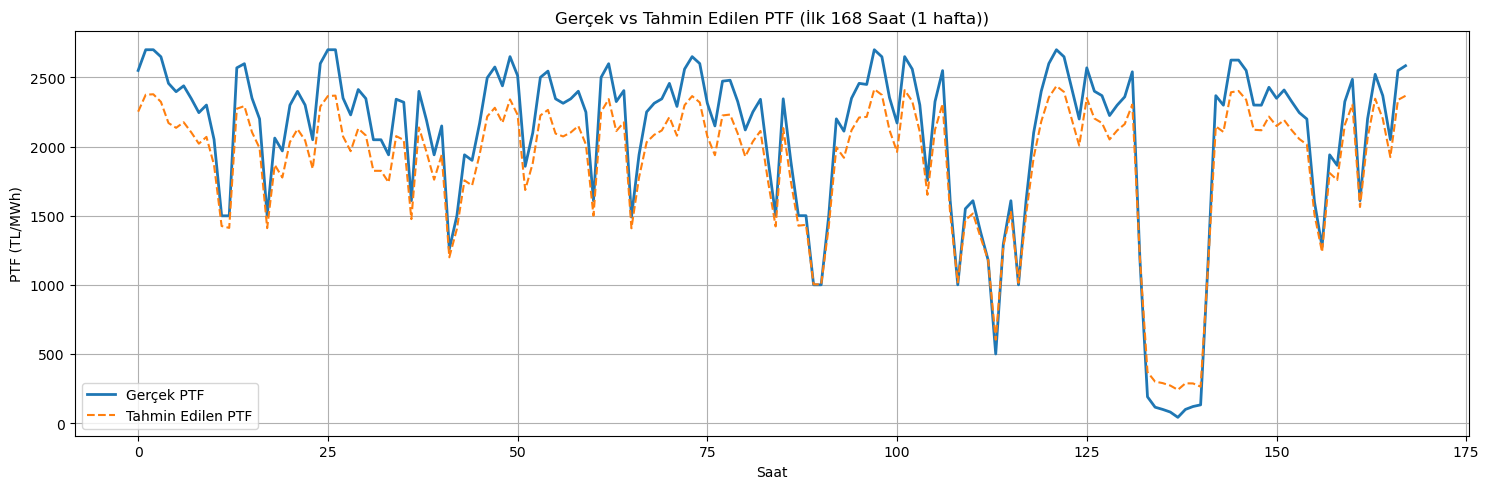

In [35]:
# GRAFIKSEL KARSILASTIRMA

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(y_true[:168], label="Gerçek PTF", linewidth=2)
plt.plot(y_pred[:168], label="Tahmin Edilen PTF", linestyle='--')
plt.title("Gerçek vs Tahmin Edilen PTF (İlk 168 Saat (1 hafta))")
plt.xlabel("Saat")
plt.ylabel("PTF (TL/MWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
